In [107]:
import numpy as np
from scipy.stats import qmc
# idaes.surrogate.pysmo.sampling.
print(__doc__)
import numpy as np
np.random.seed(123)
from sklearn.model_selection import train_test_split
import pandas as pd
import shutil
from skimage import io
import matplotlib.pyplot as plt

Automatically created module for IPython interactive environment


In [116]:
tt = np.loadtxt("/home/smmrrr/Fog_Imaging_Project/images_flattened.csv",delimiter = ",")
tt.shape

(68972, 3072)

In [9]:
3000/tt.shape[0]

0.04349591138432987

In [118]:
tt

array([[0.48235294, 0.49607843, 0.5       , ..., 0.16176471, 0.14019608,
        0.        ],
       [0.74313725, 0.49901961, 0.99509804, ..., 0.13235294, 0.14411765,
        0.12843137],
       [0.67976176, 0.69714333, 0.69896275, ..., 0.05532824, 0.04553922,
        0.05001922],
       ...,
       [0.        , 0.01372549, 0.        , ..., 0.20196078, 0.02941176,
        0.01372549],
       [0.74142745, 0.49835892, 0.99284314, ..., 0.43533039, 0.45979843,
        0.36582765],
       [0.98283353, 0.99025647, 0.99194196, ..., 0.11427961, 0.13911196,
        0.07869863]])

In [3]:
photo_info = pd.read_csv('/home/smmrrr/Fog_Imaging_Project/all_photos_link.csv')


In [4]:
photo_info

,project_files_location,photo_size
0,746574512.Sat.Aug.28_21_48_32.GMT.1993.argus00...,"(480, 640)"
1,905736605.Mon.Sep.14_01_30_05.GMT.1998.argus00...,"(480, 640, 3)"
2,1151780400.Sat.Jul.01_19_00_00.GMT.2006.argus0...,"(960, 1280, 3)"
3,995580007.Thu.Jul.19_22_00_07.GMT.2001.argus00...,"(480, 640, 3)"
4,1560808800.Mon.Jun.17_22_00_00.GMT.2019.argus0...,"(960, 1280, 3)"
...,...,...
68967,802803635.Sat.Jun.10_17_00_35.GMT.1995.argus00...,"(480, 640)"
68968,1408485600.Tue.Aug.19_22_00_00.GMT.2014.argus0...,"(960, 1280, 3)"
68969,842547625.Thu.Sep.12_17_00_25.GMT.1996.argus00...,"(480, 640)"
68970,966366006.Tue.Aug.15_19_00_06.GMT.2000.argus00...,"(480, 640, 3)"


In [10]:
image_files_summary = photo_info['project_files_location'].str.split(r'[\.|\_]',expand = True)
image_files_summary.columns = ['number_id', 'weekday', 'month_abv', 'day', 'hour', 'min', 'second', 'tz', 'year', 'camera', 'camera_angle', 'image_capture_type', 'ext']
# image_files_summary['filename'] = image_files

photo_info = pd.concat([photo_info, image_files_summary], axis = 1 )

In [19]:
# df['DataFrame Column'] = df['DataFrame Column'].astype(int)
photo_info['day'] = pd.to_numeric(photo_info['day'])
photo_info['hour'] = pd.to_numeric(photo_info['hour'])
photo_info['min']= pd.to_numeric(photo_info['min'])

In [24]:
photo_info['hour_PST'] = photo_info['hour'] - 8
photo_info.loc[photo_info['hour_PST'] < 0, 'hour_PST'] = 24 + photo_info['hour_PST'] 

In [25]:
photo_info['hour_PST'].describe()

count    68972.000000
mean        12.274720
std          4.261195
min          5.000000
25%          9.000000
50%         12.000000
75%         16.000000
max         22.000000
Name: hour_PST, dtype: float64

In [27]:
photo_info.loc[photo_info['hour_PST'].isin([4,5, 6, 21, 22, 20])]



,project_files_location,photo_size,number_id,weekday,month_abv,day,hour,min,second,tz,year,camera,camera_angle,image_capture_type,ext,hour_PST
5,901371605.Sat.Jul.25_13_00_05.GMT.1998.argus00...,"(480, 640, 3)",901371605,Sat,Jul,25,13,0,05,GMT,1998,argus00,c0,snap,jpg,5
9,743870192.Wed.Jul.28_14_36_32.GMT.1993.argus00...,"(480, 640)",743870192,Wed,Jul,28,14,36,32,GMT,1993,argus00,c0,snap,jpg,6
11,903187806.Sat.Aug.15_13_30_06.GMT.1998.argus00...,"(480, 640, 3)",903187806,Sat,Aug,15,13,30,06,GMT,1998,argus00,c0,snap,jpg,5
12,1027692007.Fri.Jul.26_14_00_07.GMT.2002.argus0...,"(480, 640, 3)",1027692007,Fri,Jul,26,14,0,07,GMT,2002,argus00,c0,snap,jpg,6
35,866354413.Sun.Jun.15_06_00_13.GMT.1997.argus00...,"(480, 640)",866354413,Sun,Jun,15,6,0,13,GMT,1997,argus00,c0,snap,jpg,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68923,1493647200.Mon.May.01_14_00_00.GMT.2017.argus0...,"(960, 1280, 3)",1493647200,Mon,May,1,14,0,00,GMT,2017,argus00,c0,snap,jpg,6
68928,1407074400.Sun.Aug.03_14_00_00.GMT.2014.argus0...,"(960, 1280, 3)",1407074400,Sun,Aug,3,14,0,00,GMT,2014,argus00,c0,snap,jpg,6
68949,1057896006.Fri.Jul.11_04_00_06.GMT.2003.argus0...,"(480, 640, 3)",1057896006,Fri,Jul,11,4,0,06,GMT,2003,argus00,c0,snap,jpg,20
68956,811490418.Tue.Sep.19_06_00_18.GMT.1995.argus00...,"(480, 640)",811490418,Tue,Sep,19,6,0,18,GMT,1995,argus00,c0,snap,jpg,22


In [130]:
photo_info.loc[photo_info['project_files_location'] == '779004018.Thu.Sep.08_06_00_18.GMT.1994.argus00.c0.snap.jpg']
photo_info.loc[photo_info['project_files_location'] == '778946434.Wed.Sep.07_14_00_34.GMT.1994.argus00.c0.snap.jpg']
photo_info.loc[photo_info['project_files_location'] == '747756024.Sat.Sep.11_14_00_24.GMT.1993.argus00.c0.snap.jpg']


,project_files_location,photo_size,number_id,weekday,month_abv,day,hour,min,second,tz,year,camera,camera_angle,image_capture_type,ext,hour_PST
30930,747756024.Sat.Sep.11_14_00_24.GMT.1993.argus00...,"(480, 640)",747756024,Sat,Sep,11,14,0,24,GMT,1993,argus00,c0,snap,jpg,6


In [131]:
print(tt[30930,:].mean())
print(tt[38827,:].mean())


0.06291264552696078
0.3724489889386744


In [132]:
mean_vals = tt.mean(axis = 1)

In [133]:
print('min', mean_vals.min())
# print('median', max_vals.median())
print('mean', mean_vals.mean())
print('max', mean_vals.max())
# print('min', max_vals.min())
# print('min', max_vals.min())

min 0.011046006944444443
mean 0.37775876728726493
max 0.984895954893025


In [135]:
print(len(mean_vals[mean_vals<0.1])/len(mean_vals))
np.where(mean_vals<0.1)

0.05451487560169344


(array([    5,     6,     8, ..., 68950, 68956, 68960]),)

In [61]:
max_vals[6]

0.18711964742772508

In [137]:
screened = photo_info.loc[np.where(mean_vals<0.1)]

In [139]:
screened.loc[screened['project_files_location'] == '1304902800.Mon.May.09_01_00_00.GMT.2011.argus00.c0.snap.jpg']
len(screened)

3760

In [140]:
keep = photo_info.loc[~photo_info.index.isin(screened.index)]

In [141]:
print(len(keep))
print(len(photo_info))

65212
68972


In [142]:
X_train, X_test = train_test_split(np.array(keep.index),
        test_size=0.95, random_state=42)

In [143]:
len(X_train)

3260

In [145]:
label_paths = photo_info.loc[X_train, 'project_files_location']

In [146]:
label_paths

7114     1059330606.Sun.Jul.27_18_30_06.GMT.2003.argus0...
25653    1025442007.Sun.Jun.30_13_00_07.GMT.2002.argus0...
49153    1531702800.Mon.Jul.16_01_00_00.GMT.2018.argus0...
13434    1312410660.Wed.Aug.03_22_31_00.GMT.2011.argus0...
8752     898482605.Mon.Jun.22_02_30_05.GMT.1998.argus00...
                               ...                        
66164    1433034000.Sun.May.31_01_00_00.GMT.2015.argus0...
40371    1283630399.Sat.Sep.04_19_59_59.GMT.2010.argus0...
921      896842805.Wed.Jun.03_03_00_05.GMT.1998.argus00...
16731    1473469200.Sat.Sep.10_01_00_00.GMT.2016.argus0...
59672    741214840.Sun.Jun.27_21_00_40.GMT.1993.argus00...
Name: project_files_location, Length: 3260, dtype: object

In [85]:
##read in already labeled points
prior_labels = pd.read_csv('/home/smmrrr/Fog_Imaging_Project/first_azure_labels.csv')

In [147]:
# photo_info.loc[0, 'project_files_location']
get_label_path = prior_labels['Url'].str.split(r'[/]',expand = True)
get_label_path.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'file']


In [149]:
label_paths = label_paths.loc[~label_paths.isin(get_label_path['file'])]
label_paths

7114     1059330606.Sun.Jul.27_18_30_06.GMT.2003.argus0...
25653    1025442007.Sun.Jun.30_13_00_07.GMT.2002.argus0...
49153    1531702800.Mon.Jul.16_01_00_00.GMT.2018.argus0...
13434    1312410660.Wed.Aug.03_22_31_00.GMT.2011.argus0...
8752     898482605.Mon.Jun.22_02_30_05.GMT.1998.argus00...
                               ...                        
66164    1433034000.Sun.May.31_01_00_00.GMT.2015.argus0...
40371    1283630399.Sat.Sep.04_19_59_59.GMT.2010.argus0...
921      896842805.Wed.Jun.03_03_00_05.GMT.1998.argus00...
16731    1473469200.Sat.Sep.10_01_00_00.GMT.2016.argus0...
59672    741214840.Sun.Jun.27_21_00_40.GMT.1993.argus00...
Name: project_files_location, Length: 3251, dtype: object

In [150]:
label_paths = label_paths.reset_index()

In [32]:
# shutil.copy('/home/smmrrr/Fog_Imaging_Project/image_data/'+'746574512.Sat.Aug.28_21_48_32.GMT.1993.argus00.c0.snap.jpg', 
#              '/home/smmrrr/Fog_Imaging_Project/label_image_data/'+'746574512.Sat.Aug.28_21_48_32.GMT.1993.argus00.c0.snap.jpg', 
#              follow_symlinks=True)

'/home/smmrrr/Fog_Imaging_Project/label_image_data/746574512.Sat.Aug.28_21_48_32.GMT.1993.argus00.c0.snap.jpg'

In [7]:
# https://idaes-pse.readthedocs.io/en/1.5.1/surrogate/pysmo/pysmo_lhs.html

# pysmo.sampling.LatinHypercubeSampling(tt, 10, sampling_type="selection")

In [37]:
###old version just moving photos
# for file in label_paths:
#     shutil.copyfile('/home/smmrrr/Fog_Imaging_Project/image_data/'+file, 
#              '/home/smmrrr/Fog_Imaging_Project/label_image_data/'+file, 
#              follow_symlinks=True)

ERROR! Session/line number was not unique in database. History logging moved to new session 218


In [101]:
image_dir = '/home/smmrrr/Fog_Imaging_Project/image_data/'


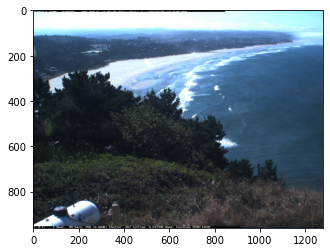

In [155]:
test_image0 = io.imread(image_dir + label_paths.loc[100, 'project_files_location'])
plt.imshow(test_image0)

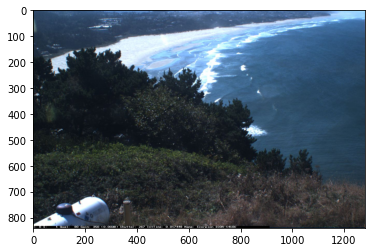

In [157]:
plt.imshow(test_image0[120::, :])

In [160]:
io.imsave('/home/smmrrr/Fog_Imaging_Project/label_image_data2/'+label_paths.loc[100, 'project_files_location']
    ,test_image0)

In [162]:

for f in range(len(label_paths)):
    im = io.imread(image_dir + label_paths.loc[f, 'project_files_location']) ## read in file
    # im = im[110:950, :, :]
    # if len(im.shape) == 3: ##if photo is in color then convert to black and white
    if im.shape[0] == 960: ## rescale photo 96 x 128
        im = im[120::]
    if im.shape[0] == 480: ## rescale photo 96 x 128            
        im = im[60::]
    io.imsave('/home/smmrrr/Fog_Imaging_Project/label_image_data2/'+label_paths.loc[f, 'project_files_location']
        ,im)    
    # plt.imshow(im)

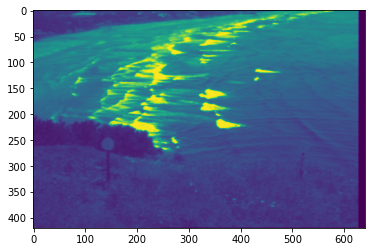

In [165]:
plt.imshow(im)

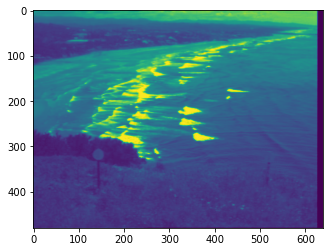

In [166]:
plt.imshow(io.imread(image_dir + label_paths.loc[f, 'project_files_location']))